In [2]:
import cv2
import numpy as np

In [2]:
#Capture video
video_name = "../data/sports500.mp4"
video = cv2.VideoCapture(video_name)

In [3]:
#Create trackers using OpenCV's CSRT(Discriminative Filter with Channel and Spatical Reliability Tracker)
# Can try with other trackers using cv2.legacy.TrackerBoosting.create(), cv2.TrackerKCF_create(), cv2.legacy.TrackerMOSSE.create()...
tracker1 = cv2.TrackerCSRT_create()
tracker2 = cv2.TrackerCSRT_create()

centroids1 = []
centroids2 = []

In [4]:
ok, frame = video.read()

# Exit if video not opened
if not video.isOpened():
    print("Could not open video")
    sys.exit()
else:
    # Get video properties
    frame_width = int(video.get(3))
    frame_height = int(video.get(4))
    fps = int(video.get(5))

# Create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*"XVID")
video_out = cv2.VideoWriter("sports2_CSRT.mp4", fourcc, fps, (frame_width, frame_height))


In [5]:
# Initial coordinates of two boxers are obtained using cv2.selectROI method
bboxes = [(309, 431, 108, 101),(415, 607, 130, 92)]
tracker1.init(frame,bboxes[0])
tracker2.init(frame,bboxes[1])

In [6]:
while True:
    ok, frame = video.read()

    if not ok:
        break
        
    ok1, bbox1 = tracker1.update(frame)
    ok2, bbox2 = tracker2.update(frame)
    
    if ok1:
        # Draw anchor boxes
        x1, y1, w1, h1 = [int(coord) for coord in bbox1]
        
        cv2.rectangle(frame, (x1, y1), (x1 + w1, y1 + h1), (0, 255, 0), 2)
       
        # Calculate and store centroids
        centroid1_x, centroid1_y = x1 + w1 // 2, y1 + h1 // 2
        
        centroids1.append((centroid1_x, centroid1_y))
        
        # Draw centroids
        cv2.circle(frame, (centroid1_x, centroid1_y), 5, (255, 0, 0), -1)
                
    if ok2:
        # Draw anchor boxes
        x2, y2, w2, h2 = [int(coord) for coord in bbox2]

        cv2.rectangle(frame, (x2, y2), (x2 + w2, y2 + h2), (0, 0, 255), 2)

        # Calculate and store centroids
        centroid2_x, centroid2_y = x2 + w2 // 2, y2 + h2 // 2

        centroids2.append((centroid2_x, centroid2_y))

        # Draw centroids
        cv2.circle(frame, (centroid2_x, centroid2_y), 5, (255, 0, 0), -1)
             
    # Write the frame to the output video
    video_out.write(frame)

# Release resources
video.release()
video_out.release()
cv2.destroyAllWindows()

# Save centroids as NumPy arrays
centroids1 = np.array(centroids1)
centroids2 = np.array(centroids2)

np.save('centroids_boxer_1.npy', centroids1)
np.save('centroids_boxer_2.npy', centroids2)

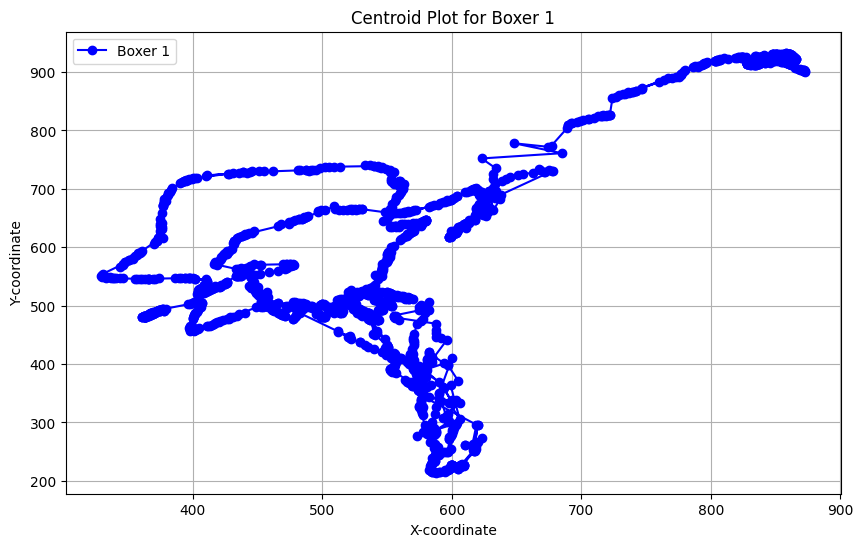

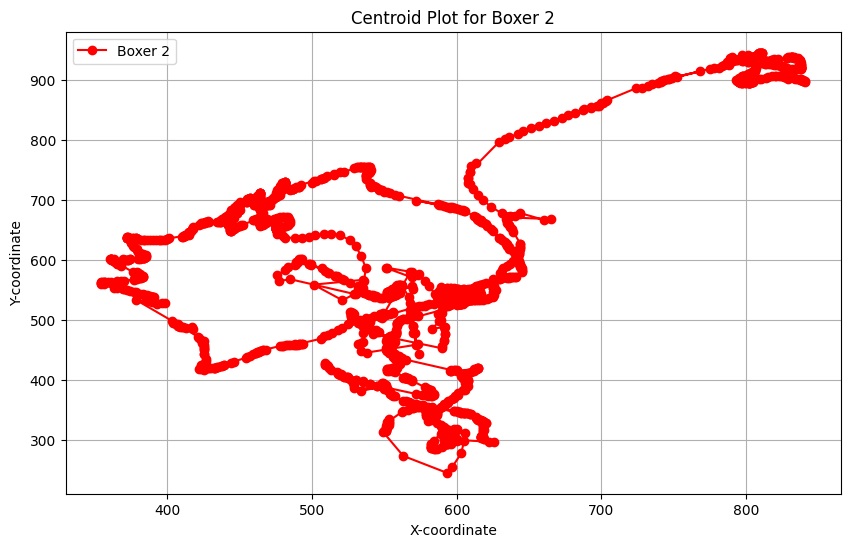

In [3]:
import matplotlib.pyplot as plt
# Load centroids from the saved numpy files
centroids_boxer1 = np.load('centroids_boxer_1.npy')
centroids_boxer2 = np.load('centroids_boxer_2.npy')

# Plot centroids for Boxer 1
plt.figure(figsize=(10, 6))
plt.plot(centroids_boxer1[:, 0], centroids_boxer1[:, 1], marker='o', linestyle='-', color='b', label='Boxer 1')
plt.title('Centroid Plot for Boxer 1')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.legend()
plt.grid(True)
plt.show()

# Plot centroids for Boxer 2
plt.figure(figsize=(10, 6))
plt.plot(centroids_boxer2[:, 0], centroids_boxer2[:, 1], marker='o', linestyle='-', color='r', label='Boxer 2')
plt.title('Centroid Plot for Boxer 2')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.legend()
plt.grid(True)
plt.show()